<a href="https://colab.research.google.com/github/AbanoubIbrahim98/Mi-Card/blob/main/Chatbot_training_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset = 'drive/My Drive/dataset-chatbot-v2.json'

In [30]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import random


In [19]:
with open(dataset) as content:
  data1 = json.load(content)

In [21]:
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [14]:
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})


In [15]:
data = data.sample(frac=1)


In [16]:
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))

In [22]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
x_train = pad_sequences(train)
#encoding the outputs
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [23]:
input_shape = x_train.shape[1]
print(input_shape)


8


In [24]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  96
output length:  8


In [25]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [26]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam', metrics=['accuracy'])

In [27]:
train = model.fit(x_train,y_train,epochs=200)


Epoch 1/200
3/3 [==============================] - 31s 8ms/step - loss: 2.0761 - accuracy: 0.1802
Epoch 2/200
3/3 [==============================] - 0s 5ms/step - loss: 2.0717 - accuracy: 0.2260
Epoch 3/200
3/3 [==============================] - 0s 5ms/step - loss: 2.0700 - accuracy: 0.2127
Epoch 4/200
3/3 [==============================] - 0s 5ms/step - loss: 2.0645 - accuracy: 0.2367
Epoch 5/200
3/3 [==============================] - 0s 5ms/step - loss: 2.0586 - accuracy: 0.2501
Epoch 6/200
3/3 [==============================] - 0s 5ms/step - loss: 2.0537 - accuracy: 0.2361
Epoch 7/200
3/3 [==============================] - 0s 5ms/step - loss: 2.0469 - accuracy: 0.2478
Epoch 8/200
3/3 [==============================] - 0s 5ms/step - loss: 2.0438 - accuracy: 0.1814
Epoch 9/200
3/3 [==============================] - 0s 5ms/step - loss: 2.0374 - accuracy: 0.2088
Epoch 10/200
3/3 [==============================] - 0s 5ms/step - loss: 2.0324 - accuracy: 0.2049
Epoch 11/200
3/3 [==========

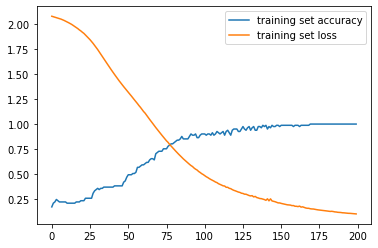

In [29]:
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [34]:
def start_chat():
  while True:
    texts_p = []
    prediction_input = input('You : ')

    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)

    #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()

    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("Going Merry : ",random.choice(responses[response_tag]))
    if response_tag == "goodbye":
      break



In [35]:
start_chat()


You : hi
Going Merry :  Hi. Welcome to the world's largest pirate organization - The Strawhats
You : how are you 
Going Merry :  I am doing good. Life is boring. need to go on an adventure
You : bye
Going Merry :  Goodbye
